In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain
%pip install torchlibrosa

In [4]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import Conv1d
from genrecog.tools.trainer import FbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader
from importlib import reload
import matplotlib.pyplot as plt

import speechbrain as sb

from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.preprocess.feature import Feature
import matplotlib.pyplot as plt

import numpy as np 

In [5]:
train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
X,y = train_preprcessor.as_shuffled_numpy()
X_test, y_test = test_preprcessor.as_shuffled_numpy()

In [7]:
feature_maker = Feature()
X_sample = feature_maker.numpy_fbank_features(X)
X_test_sample = feature_maker.numpy_fbank_features(X_test)
X_sample.shape

(3600, 702, 40)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sample_flat = X_sample.reshape(-1, 702*40)
X_test_flat = X_test_sample.reshape(-1, 702*40)
scaler.fit(X_sample_flat)
X_scaled = scaler.transform(X_sample_flat)
X_scaled_test = scaler.transform(X_test_flat)

In [19]:
from sklearn.preprocessing import normalize
X_normalized = normalize(X_sample.reshape(-1, 702*40), axis=1)
X_normalized_test = normalize(X_test_sample.reshape(-1, 702*40), axis=1)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_normalized)
X_transformed = pca.transform(X_normalized)
X_test_transformed = pca.transform(X_normalized_test)


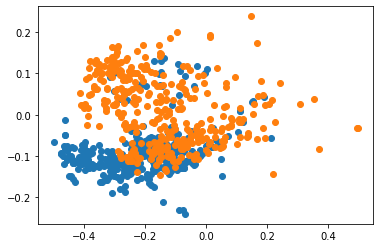

In [20]:
# plt.scatter(X_transformed[:,0][y==0], X_transformed[:,1][y==0])
# plt.scatter(X_transformed[:,0][y==1], X_transformed[:,1][y==1])
plt.scatter(X_transformed[:,0][y==2], X_transformed[:,1][y==2])
# plt.scatter(X_transformed[:,0][y==3], X_transformed[:,1][y==3])
# plt.scatter(X_transformed[:,0][y==4], X_transformed[:,1][y==4])
plt.scatter(X_transformed[:,0][y==5], X_transformed[:,1][y==5])
# plt.scatter(X_transformed[:,0][y==6], X_transformed[:,1][y==6])
# plt.scatter(X_transformed[:,0][y==7], X_transformed[:,1][y==7])
# plt.scatter(X_transformed[:,0][y==8], X_transformed[:,1][y==8])
# plt.scatter(X_transformed[:,0][y==9], X_transformed[:,1][y==9])

IndexError: ignored

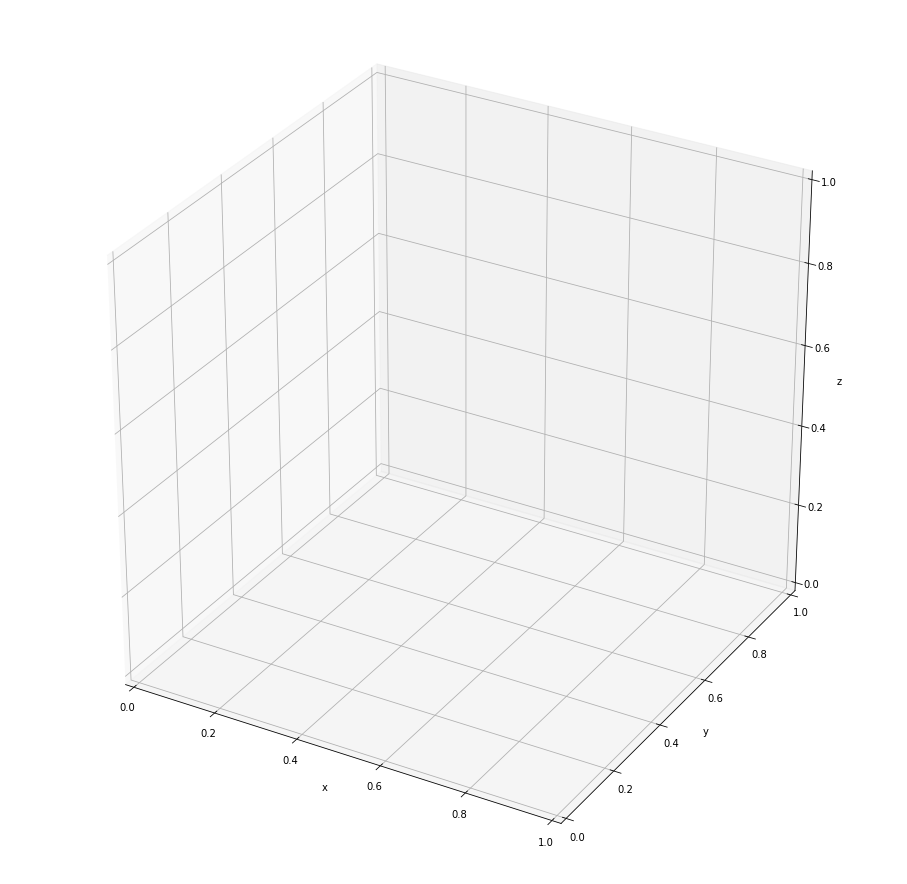

In [29]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(X_transformed[:,0][y==0], X_transformed[:,1][y==0], X_transformed[:,2][y==0], s= 0.5)
ax.scatter(X_transformed[:,0][y==1], X_transformed[:,1][y==1], X_transformed[:,2][y==1], s= 0.5)
ax.scatter(X_transformed[:,0][y==2], X_transformed[:,1][y==2], X_transformed[:,2][y==2], s= 0.5)
ax.scatter(X_transformed[:,0][y==3], X_transformed[:,1][y==3], X_transformed[:,2][y==3], s= 0.5)
ax.scatter(X_transformed[:,0][y==4], X_transformed[:,1][y==4], X_transformed[:,2][y==4], s= 0.5)
ax.scatter(X_transformed[:,0][y==5], X_transformed[:,1][y==5], X_transformed[:,2][y==5], s= 0.5)
plt.show()

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(X_transformed)
kmeans.labels_


array([7, 0, 8, ..., 1, 0, 4], dtype=int32)

In [23]:
kmeans.predict(X_test_transformed[:][y_test==0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
kmeans.predict(X_test_transformed[:][y_test==1])
# kmeans.predict(X_transformed[:][y==1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
kmeans.predict(X_test_transformed[:][y_test==2])
# kmeans.predict(X_test_transformed[:][y_test==2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
kmeans.predict(X_test_transformed[:][y_test==3])


array([6, 6, 6, 0, 3, 0, 6, 0, 0, 0, 6, 6, 6, 6, 6, 6, 3, 6, 6, 3, 0, 0,
       6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 3, 6, 6, 6, 6], dtype=int32)

In [ ]:
kmeans.predict(X_test_transformed[:][y_test==4])

array([3, 4, 1, 3, 4, 1, 1, 4, 1, 3, 7, 3, 3, 1, 1, 1, 3, 3, 1, 9, 1, 1,
       4, 9, 1, 1, 3, 9, 1, 1, 1, 0, 3, 3, 3, 4, 4, 4, 1, 3], dtype=int32)

In [ ]:
kmeans.predict(X_test_transformed[:][y_test==5])

array([8, 8, 8, 8, 0, 8, 8, 8, 8, 9, 8, 5, 8, 8, 8, 0, 0, 0, 8, 8, 9, 8,
       8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8], dtype=int32)

In [ ]:
kmeans.predict(X_test_transformed[:][y_test==6])

array([6, 0, 6, 0, 6, 6, 6, 6, 1, 1, 0, 6, 0, 1, 3, 1, 1, 1, 1, 3, 6, 1,
       1, 6, 6, 6, 0, 6, 6, 6, 1, 0, 1, 6, 6, 6, 6, 1, 6, 6], dtype=int32)

In [ ]:
kmeans.predict(X_test_transformed[:][y_test==7])

array([0, 1, 0, 4, 4, 4, 4, 0, 9, 0, 9, 8, 6, 4, 4, 1, 1, 0, 0, 6, 8, 4,
       4, 6, 8, 6, 1, 3, 9, 9, 0, 3, 6, 4, 6, 1, 3, 3, 8, 1], dtype=int32)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(random_state=0)
dtree_model.fit(X_scaled, y)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree_model.predict(X_scaled_test))

0.2625

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_transformed, y)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_model.predict(X_test_transformed))

0.3975

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(X_scaled, y)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ada_model.predict(X_scaled_test))

In [ ]:
from sklearn.svm import SVC

models = []
for i in range(10):
  for j in range(i+1,10):
    print(i, j)
    X_0 = X_scaled[:][y==i]
    X_1 = X_scaled[:][y==j]
    y_0 = y[:][y==i]
    y_1 = y[:][y==j]
    X_0_1 = np.concatenate((X_0, X_1))
    y_0_1 = np.concatenate((y_0, y_1))
    # X_0_1.shape
    # X_sample = feature_maker.numpy_fbank_features(X_0_1)
    # X_sample_flat = X_sample.reshape(-1,702*40)
    svm = SVC()
    svm.fit(X_0_1, y_0_1)
    models.append(svm)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 7
6 8
6 9
7 8
7 9
8 9


In [ ]:
# X_sample_test = feature_maker.numpy_fbank_features(X_test[0:3600]).reshape(-1,702*40)
print("answer", y_test[0:3600])
print(len(models))
count = 0
results = []
for model in models:
  count += 1
  print(count)
  results.append(model.predict(X_scaled_test))
  # print(model.predict(X_sample_test.reshape(-1,702*40)[30:60]))


most_f = np.array([np.bincount(row).argmax() for row in np.array(results).T])
most_f

answer [1 0 5 1 6 3 2 2 7 0 1 7 7 5 9 9 3 9 0 6 8 6 4 9 2 1 4 7 0 9 5 4 9 5 0 2 1
 8 1 2 1 9 3 4 1 7 6 6 2 3 3 0 0 4 5 3 4 1 4 2 0 5 3 3 9 6 3 7 2 0 2 8 0 7
 2 8 5 5 6 0 4 1 1 7 6 6 2 9 9 9 9 5 7 2 5 6 0 8 0 5 4 2 8 6 0 7 5 7 7 5 9
 3 1 5 1 4 3 2 1 8 8 7 2 6 7 5 1 1 2 6 4 1 6 4 5 7 2 6 1 2 9 6 6 8 9 6 1 0
 9 9 3 2 5 0 5 3 7 5 5 8 8 3 4 1 1 4 0 7 1 7 6 4 2 5 3 9 3 9 8 3 2 7 9 4 8
 1 4 0 2 2 4 9 7 8 8 4 8 6 4 3 9 3 9 7 0 5 8 9 3 8 9 0 6 0 4 0 3 8 5 5 7 0
 7 4 0 3 2 8 7 9 2 3 1 3 4 9 5 7 9 0 6 9 9 3 9 8 4 6 7 3 8 0 8 4 0 5 1 4 8
 6 1 9 2 2 5 7 7 6 4 2 7 9 5 2 9 1 2 8 4 4 6 4 7 3 1 6 0 7 6 6 7 3 4 2 4 7
 5 0 5 4 3 5 9 4 2 8 2 3 0 8 8 4 7 5 8 9 1 3 6 2 3 1 0 0 9 7 8 7 1 8 7 8 0
 5 8 3 6 2 4 0 6 8 8 4 6 5 4 1 8 8 1 1 6 6 0 1 0 6 1 8 4 2 0 1 2 6 3 7 6 2
 0 1 2 3 8 4 5 0 3 9 6 6 9 7 5 0 7 5 3 5 9 5 3 2 8 5 3 1 3 1]
45
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


array([1, 8, 5, 3, 6, 3, 2, 2, 0, 0, 6, 7, 0, 9, 9, 9, 3, 0, 9, 0, 8, 5,
       4, 2, 2, 6, 8, 0, 0, 8, 9, 1, 9, 2, 9, 2, 3, 1, 1, 2, 0, 9, 3, 4,
       1, 8, 5, 6, 2, 3, 3, 0, 0, 4, 9, 3, 4, 5, 4, 1, 8, 9, 3, 3, 0, 2,
       3, 7, 2, 0, 2, 8, 0, 0, 2, 8, 2, 9, 6, 0, 4, 3, 0, 7, 2, 1, 2, 9,
       9, 8, 9, 9, 8, 2, 2, 1, 0, 1, 0, 5, 4, 2, 4, 0, 0, 0, 2, 8, 2, 9,
       8, 3, 1, 9, 0, 4, 3, 2, 1, 2, 1, 9, 2, 6, 0, 9, 5, 8, 7, 0, 4, 1,
       2, 4, 9, 1, 9, 7, 1, 9, 9, 1, 6, 1, 9, 1, 1, 7, 5, 2, 3, 2, 0, 0,
       9, 3, 7, 9, 5, 8, 8, 3, 4, 0, 0, 4, 9, 0, 1, 0, 1, 4, 9, 9, 3, 0,
       3, 1, 7, 3, 2, 0, 0, 4, 8, 2, 4, 0, 9, 2, 4, 0, 2, 8, 0, 4, 0, 1,
       1, 3, 9, 3, 9, 2, 0, 6, 1, 2, 3, 8, 2, 9, 6, 8, 4, 0, 3, 8, 9, 5,
       0, 0, 1, 4, 0, 3, 9, 3, 2, 7, 9, 3, 6, 3, 4, 2, 2, 2, 9, 0, 1, 0,
       0, 3, 9, 8, 4, 1, 6, 3, 8, 9, 1, 4, 9, 2, 1, 4, 1, 2, 3, 0, 2, 6,
       9, 0, 7, 2, 4, 9, 7, 1, 7, 2, 9, 8, 2, 8, 1, 8, 2, 4, 8, 3, 2, 0,
       0, 7, 5, 2, 7, 3, 4, 5, 9, 5, 5, 9, 9, 4, 3,

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(most_f, y_test[0:3600]))

0.4975
